## Credit Card Holders Default Status

### Reading and Understanding the data

Required libraries

In [154]:
import numpy as np #linear algebra
import pandas as pd #Data Processing

Reading the Database

In [155]:
#path_German = "/Users/gaddamnitish/Desktop/default_of_credit_card_clients.xls"
path_German = "/Users/gaddamnitish/Desktop/PTG/PTG_German_Credit_Data/default_of_credit_card_clients.xls"
data_German = pd.read_excel(path_German, skiprows=1)
data_Taiwan = pd.read_excel(path_German, skiprows=1)
#Setting the first row as header
#data_German = data_German.rename(columns=data_German.iloc[0]) #I locked the first row to be the header

Displaying the first 5 rows of the excelsheet...bill amt behind pay amt

In [156]:
data_German.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Dataset Basic Description and attributes(Count, Frequency etc)

In [157]:
data_German.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Reading out the column names

In [158]:
data_German.columns
#data_German.columns.values

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [159]:
data_Taiwan.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [160]:
data_German = data_German.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
data_German.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Check missing data

In [161]:
Total = data_German.isnull().sum().sort_values(ascending = False)
Percent = (data_German.isnull().sum()/data_German.isnull().count()*100).sort_values(ascending = False)
pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent']).transpose()

,def_pay,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Making sure the column names in the excel and the dataframe are the same

In [162]:
data_German.head(0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay


Displaying Customer details in a new DataFrame named data_Customers

In [163]:
data_Customers = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
data_German[data_Customers].head() 
#Pulling out only the Customer columns I like

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,2,2,1,24
1,2,120000,2,2,2,26
2,3,90000,2,2,2,34
3,4,50000,2,2,1,37
4,5,50000,1,2,1,57


In [164]:
#displaying only values for men
print('Printing Married:')
data_German[data_German['SEX'] == 1].head(5)
#Married:1, Unmarried:2, Others:3

Printing Married:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1


In [165]:
#print("Purpose : ",Data.Purpose.unique())
#print("Sex : ",data_German[Sex].unique())
#print("Housing : ",data_German.Housing.unique())
#print("Saving accounts : ",data_German['Saving accounts'].unique())
#print("Checking account : ",data_German['Checking account'].unique())


In [166]:
print("Sex :", sorted(data_German.SEX.unique()))
print("Sex value_counts:", sorted(data_German.SEX.value_counts()))
print('----------------------------------------------------')
print("EDUCATION :", sorted(data_German.EDUCATION.unique()))
print("EDUCATION value_counts:", sorted(data_German.EDUCATION.value_counts()))
print('----------------------------------------------------')
print("MARRIAGE :", sorted(data_German.MARRIAGE.unique()))
print("MARRIAGE value_counts:", sorted(data_German.MARRIAGE.value_counts()))
print('----------------------------------------------------')
print("default payment next month :", data_German.def_pay.unique())
print("default payment next month value_counts:", data_German.def_pay.value_counts())
print('----------------------------------------------------')
print("AGE :", sorted(data_German.AGE.unique()))
print("AGE value_counts:", sorted(data_German.AGE.value_counts()))

Sex : [1, 2]
Sex value_counts: [11888, 18112]
----------------------------------------------------
EDUCATION : [0, 1, 2, 3, 4, 5, 6]
EDUCATION value_counts: [14, 51, 123, 280, 4917, 10585, 14030]
----------------------------------------------------
MARRIAGE : [0, 1, 2, 3]
MARRIAGE value_counts: [54, 323, 13659, 15964]
----------------------------------------------------
default payment next month : [1 0]
default payment next month value_counts: 0    23364
1     6636
Name: def_pay, dtype: int64
----------------------------------------------------
AGE : [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79]
AGE value_counts: [1, 1, 3, 3, 3, 4, 5, 10, 15, 16, 24, 25, 31, 31, 44, 56, 67, 67, 83, 122, 122, 178, 209, 247, 304, 325, 340, 411, 452, 466, 501, 560, 570, 617, 670, 700, 794, 824, 870, 931, 944, 954, 1041, 1108, 11

In [167]:
 #this is fine, more women than men
print("PAY_1 value_counts:", sorted(data_German.PAY_1.value_counts()))
print("PAY_1 :", sorted(data_German.PAY_1.unique()))
print('----------------------------------------------------')
print("PAY_2 value_counts:", sorted(data_German.PAY_2.value_counts()))
print("PAY_2 :", sorted(data_German.PAY_2.unique()))
print('----------------------------------------------------')
print("PAY_3 value_counts:", sorted(data_German.PAY_3.value_counts()))
print("PAY_3 :", sorted(data_German.PAY_3.unique()))
print('----------------------------------------------------')
print("PAY_4 value_counts:", sorted(data_German.PAY_4.value_counts()))
print("PAY_4 :", sorted(data_German.PAY_4.unique()))

PAY_1 value_counts: [9, 11, 19, 26, 76, 322, 2667, 2759, 3688, 5686, 14737]
PAY_1 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
----------------------------------------------------
PAY_2 value_counts: [1, 12, 20, 25, 28, 99, 326, 3782, 3927, 6050, 15730]
PAY_2 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
----------------------------------------------------
PAY_3 value_counts: [3, 4, 21, 23, 27, 76, 240, 3819, 4085, 5938, 15764]
PAY_3 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
----------------------------------------------------
PAY_4 value_counts: [2, 2, 5, 35, 58, 69, 180, 3159, 4348, 5687, 16455]
PAY_4 : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


MY ASSUMPTIONS REGARDING PAY_1 VALUES ARE AS FOLLOWS:

-2: No consumption; Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)
    
-1: Paid in full; , but account has a positive balance at end of period due to recent transactions for which payment has not yet come due
    
0: The use of revolving credit; Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance
    
1 = payment delay for one month;

2 = payment delay for two months;

8 = payment delay for eight months; 

9 = payment delay for nine months and above.

In [168]:
data_German.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def_pay      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [169]:
# Payment delay description
data_German[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [170]:
# Bill Statement description description
data_German[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [171]:
#Previous Payment Description description description
data_German[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [172]:
data_German.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

### Tidying Data

In [173]:
#After tidying data set
print(str(data_German))

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
5          6      50000    1          1         2   37      0      0      0   
6          7     500000    1          1         2   29      0      0      0   
7          8     100000    2          2         2   23      0     -1     -1   
8          9     140000    2          3         1   28      0      0      2   
9         10      20000    1          3         2   35     -2     -2     -2   
10        11     200000    2          3         2   34      0      0      2   
11        12     260000    2          1         2   

Should I create 3 new columns:

Total_pay_6_months : PAY_1 + .... + PAY_6
Avg_pay_6_months : Total_pay_6_months / 6

Total_BILL_AMT_6_months : BILL_AMT_1 + .... + BILL_AMT_6
Avg_BILL_AMT_6_months : Total_BILL_AMT_6_months / 6

Total_pay_6_months : PAY_AMT_1 + .... + PAY_AMT_6
Avg_PAY_AMT_6_months : Avg_PAY_AMT_6_months/6

In [174]:
# Other ways of getting this kind of numbers (as a reference for newbies like myself)
print(data_German.shape)
print(data_German.shape[0])
print(data_German.def_pay.count())
print(len(data_German.axes[1]))

(30000, 25)
30000
30000
25


In [175]:
data_German.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def_pay      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
print(data_German['SEX'].value_counts())
print('SEX length is', len(data_German['SEX']))
#MARRIAGE: Marital status (1=married, 2=single, 3=others)

#looks good

2    18112
1    11888
Name: SEX, dtype: int64
SEX length is 30000


In [178]:
print(data_German['MARRIAGE'].value_counts())
print('MARRIAGE length is', len(data_German['MARRIAGE']))
#MARRIAGE: Marital status (1=married, 2=single, 3=others)

#There are 54 values named 0 that have to be reallocated

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
MARRIAGE length is 30000


In [179]:
data_German.loc[data_German.MARRIAGE == 0, 'MARRIAGE'] = 3
data_German.MARRIAGE.value_counts()

#looks good

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [180]:
print(data_German['EDUCATION'].value_counts())
print('EDUCATION length is', len(data_German['EDUCATION']))
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

#There are 14 values named 0 that have to be reallocated

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
EDUCATION length is 30000


In [181]:
fil = (data_German.EDUCATION == 5) | (data_German.EDUCATION == 6) | (data_German.EDUCATION == 0)
data_German.loc[fil, 'EDUCATION'] = 4
data_German.EDUCATION.value_counts()

#looks good

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### EDA

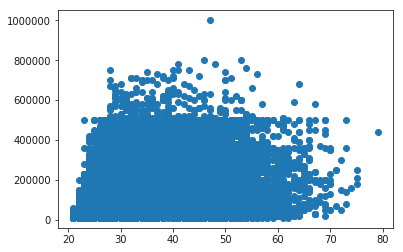

In [182]:
plt.scatter(data_German['AGE'], data_German['LIMIT_BAL'])
plt.figure()

In [183]:
gender = data_German.groupby(['SEX', 'def_pay']).size().unstack(1)
# data_German.crosstab(data_German.SEX, data_German.def_pay)
gender

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


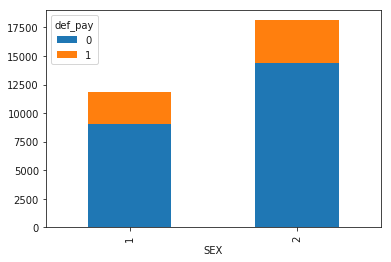

In [184]:
gender.plot(kind='bar', stacked = True)

In [185]:
# I am interested in having a general idea of the default probability
data_German.def_pay.sum() / len(data_German.def_pay)

0.22120000000000001

In [186]:
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
#this creates a new column in our dataset
gender

def_pay,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


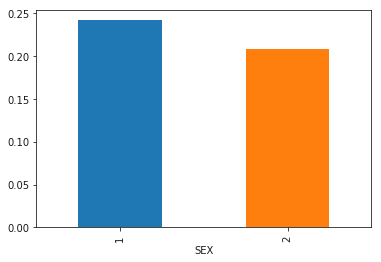

In [187]:
# and we can visualize it
gender.perc.plot(kind = 'bar')

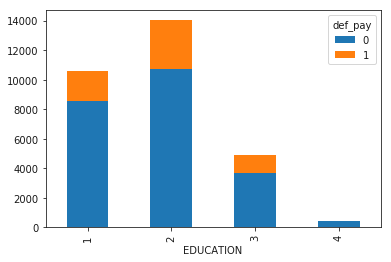

In [188]:
ed = data_German.groupby(['EDUCATION', 'def_pay']).size().unstack()
ed.plot(kind = 'bar', stacked = True)

In [189]:
ed['perc'] = (ed[1]/(ed[0] + ed[1]))
ed

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


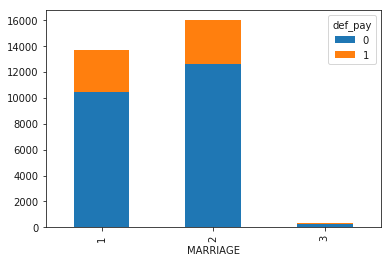

In [190]:


mar = data_German.groupby(['MARRIAGE', 'def_pay']).size().unstack()
mar.plot(kind = 'bar', stacked = True)



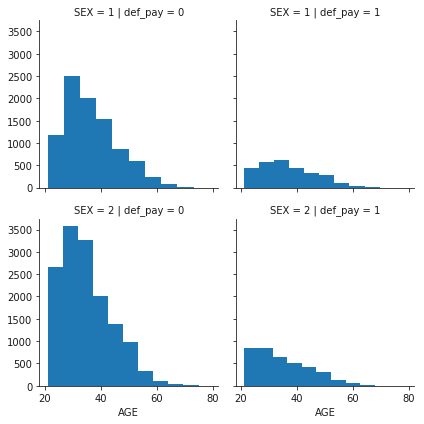

In [191]:
g = sns.FacetGrid(data_German, col='def_pay', row= "SEX")
g.map(plt.hist, 'AGE')

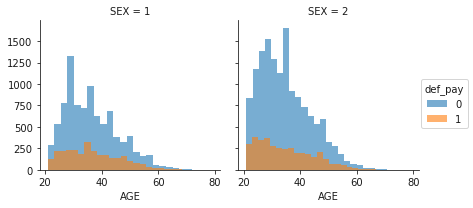

In [192]:
g = sns.FacetGrid(data_German, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for transparency
g.add_legend()

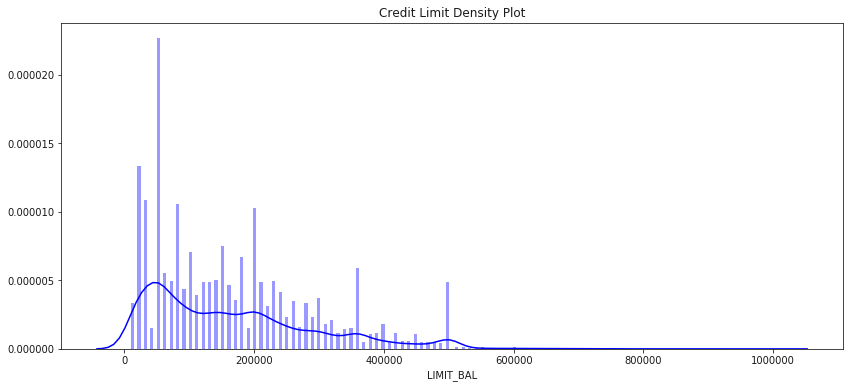

In [193]:
plt.figure(figsize=(14, 6))
plt.title('Credit Limit Density Plot')
sns.set_color_codes('pastel')
sns.distplot(data_German['LIMIT_BAL'], kde=True, bins=200, color= 'blue')

check for outlier......scatterplot

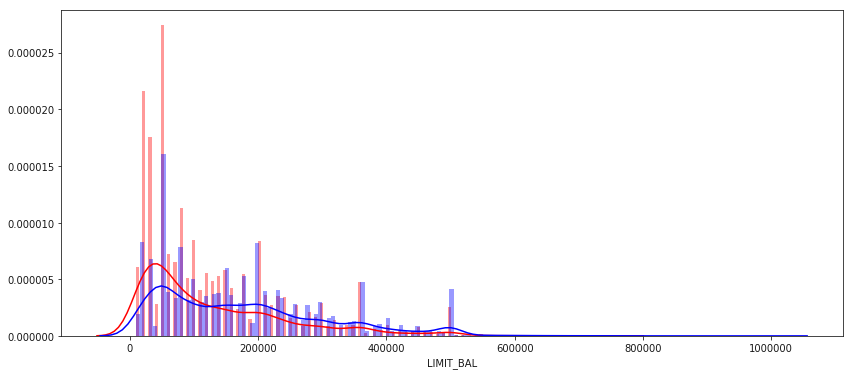

In [194]:
#Here we are grouping the above plot by default payment next month value

type_0 = data_German.loc[data_German['def_pay'] == 0]['LIMIT_BAL']
type_1 = data_German.loc[data_German['def_pay'] == 1]["LIMIT_BAL"]

plt.figure(figsize= (14,6))
sns.set_color_codes('pastel')

sns.distplot(type_1, kde=True, bins=150, color='Red')
sns.distplot(type_0, kde=True, bins=150, color='Blue')

plt.show()

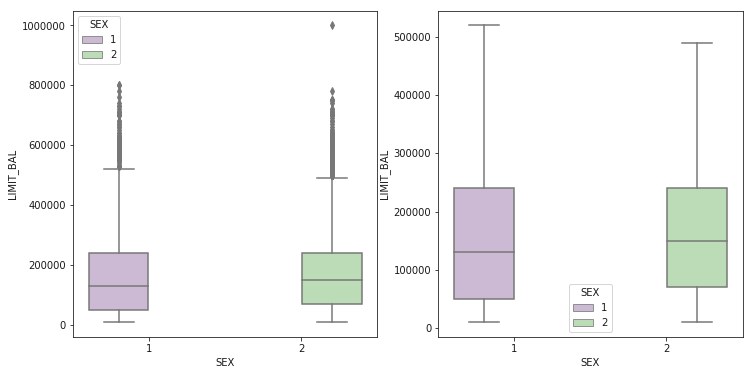

In [195]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_German, palette="PRGn",showfliers=True, )
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_German, palette="PRGn",showfliers=False)
plt.show();

Age Distribution grouped by marriage status and sex

MARRIAGE
- 1 : Married 
- 2 : Single 
- 3 : Others

SEX
- 1 : Male 
- 2 : Female

In [196]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1= plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3, data=data_Taiwan, palette='PRGn', showfliers=False)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

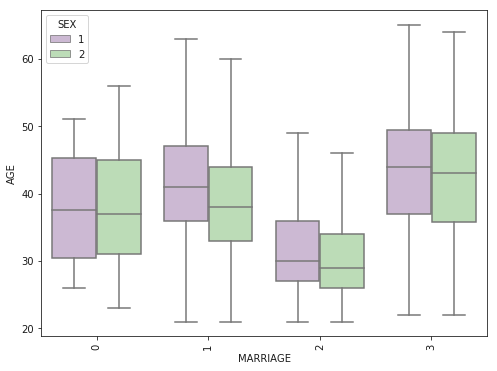

We can observe that for Others(Marriage:3), the median age is around 45 and the max is above 60 years...this could mean a lot of the people in Others could be divorced


In [197]:
boxplot_variation('MARRIAGE', 'AGE', 'SEX', 8)
print('We can observe that for Others(Marriage:3), the median age is around 45 and the max is above 60 years...this could mean a lot of the people in Others could be divorced')

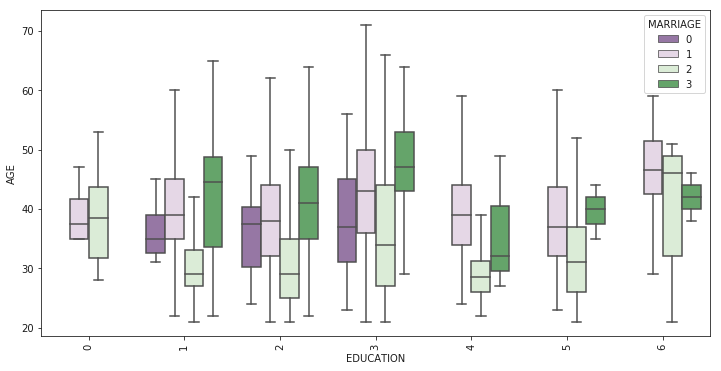

We can obsrve that unmarried people(Marriage: 2), have comparitively less education. This could mean lesser the education, lesser the desirability.


In [198]:
#Unmarried ppl could be younger
boxplot_variation('EDUCATION','AGE', 'MARRIAGE', 12)
print("We can obsrve that unmarried people(Marriage: 2), have comparitively less education. This could mean lesser the education, lesser the desirability.")

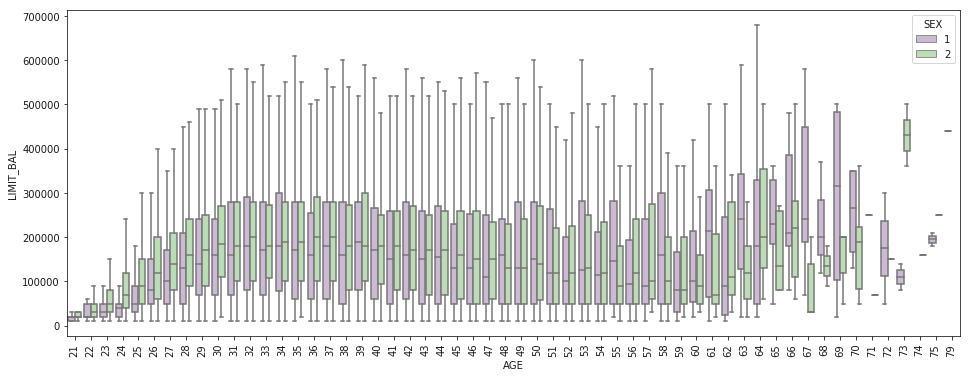

Memedianan, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.


In [199]:
boxplot_variation('AGE', 'LIMIT_BAL', 'SEX', 16)
print('Memedianan, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.')

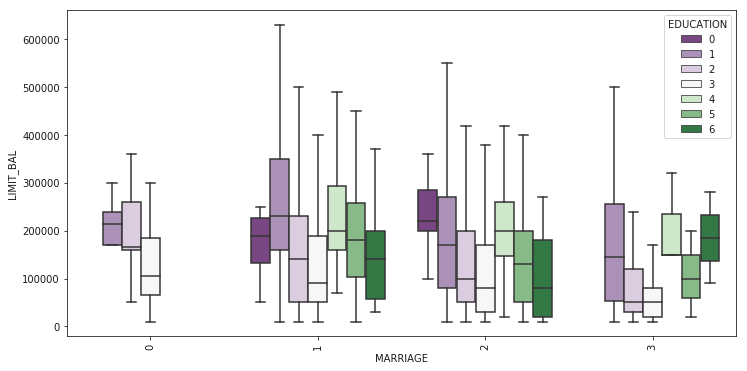

We can observe that the higher the education, more the Limit Balance. Married Graduates as we can observe maintain the highest Limit Balance


In [200]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)
print('We can observe that the higher the education, more the Limit Balance. Married Graduates as we can observe maintain the highest Limit Balance')

Determine what variables effect the target most
If there is no consumption of money, is def_pay =0?
Check most variables on the target

### Feature Engineering

Regarding 'Sex' variable: 2 > 1, but is a female greater than a male? Nope, we live in the world of ruling equality (thankfully), so why should we risk teaching our model some wrong concepts about people that use credit cards? Thus, let's convert integers back to strings (man & woman) and then create dummy variables for each of them.

In [229]:
data_German['SEX'] = data_German['SEX'].map({1 : 'Male', 2 : 'Female'})

KeyError: 'SEX'

In [230]:
data_German.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,Adult,Mature,Old,Perfect_payer,Unreliable_payer,Fucked_up_payer,Zero_credit_payer,Pseudo_turnover,Only_debt,6m_payments_debt_ratio
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,3913,0,0.034450
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,0,0,-579,0,0.041667
2,90000,34,0,0,0,0,0,0,29239,14027,...,1,0,0,0,0,0,1,13690,0,0.122422
3,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,0,1,17443,0,0.167760
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,0,0,-10514,0,1.180980


From the first look, the 'Education variable' seems to have a similar issue, but here we can guess that data authors give us an ordered list of nominal values in descending order:

- 1 - (graduate scool) - the coolest option
- 2 - (university) - still OK
- 3 - (high school) - not an academic type of person, but still 'normal'
- 4 - (others) - guys lacking high school diploma (or something else?)

Why don't we adapt a similar approach as for the variable 'Sex'?

In [205]:
data_German['EDUCATION'] = data_German['EDUCATION'].map({1 : 'Graduation', 2: 'University', 3: 'High School', 4: 'Others'})

In [206]:
data_German.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,NaN,University,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,NaN,University,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,NaN,University,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,NaN,University,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,NaN,University,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


'Marriage' aka Marital status. Same, reverse convertion & dummy creation (One-hot-encoding).

In [207]:
data_German['MARRIAGE'] = data_German['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'})

In [208]:
data_German.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,NaN,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,NaN,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,NaN,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,NaN,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,NaN,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [209]:
data_German = pd.get_dummies(data_German, columns= ['SEX', 'EDUCATION', 'MARRIAGE'])

In [231]:
data_German.head(5)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,Adult,Mature,Old,Perfect_payer,Unreliable_payer,Fucked_up_payer,Zero_credit_payer,Pseudo_turnover,Only_debt,6m_payments_debt_ratio
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,3913,0,0.034450
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,0,0,-579,0,0.041667
2,90000,34,0,0,0,0,0,0,29239,14027,...,1,0,0,0,0,0,1,13690,0,0.122422
3,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,0,1,17443,0,0.167760
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,0,0,-10514,0,1.180980


In [212]:
data_German.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay', 'EDUCATION_Graduation',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single'],
      dtype='object')

In [213]:
data_German = data_German.drop('ID', axis= 1)

'Age'. Apart from forcing our boosted trees to learn very specific age-related patterns, let's bucket Bank's customers into enlarged age groups (min age for clients in dataset is 21):
- Young : 21-33 y.o
- Adults : 34-45 y.o
- Mature : 46-60 y.o
- Elderly : 61+ y.o

In [214]:
data_German['Young'] = np.where((data_German['AGE'] >= 21) & (data_German['AGE'] <= 33), 1, 0)
data_German['Adult'] = np.where((data_German['AGE'] >= 34) & (data_German['AGE'] <= 45), 1, 0)
data_German['Mature'] = np.where((data_German['AGE'] >= 46) & (data_German['AGE'] <= 60), 1, 0)
data_German['Old'] = np.where((data_German['AGE'] >= 61), 1, 0)

In [215]:
data_German.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,Young,Adult,Mature,Old
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,1,0,0,1,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,1,0,0,1,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,1,0,0,1,0,1,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,1,1,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,1,1,0,0,0,0,1,0


Variables [PAY_0] to [PAY_6] can take values -1 to 9. 
However, from EDA we can see that they actually take values -2 to 8. 
Lets add 1 to every column, so we can stick to the original data structure.

- Perfect_payer : if {[PAY_1] to [PAY6] are all equal to '-1'}, (Perfect_payer = 1)
- Unreliable_payer : if {[PAY_1] to [PAY6] > 0 }, (Unreliable_payer = 1)
- Fucked_up_payer : if { Sum([PAY_1] to [PAY6]) > 6 }, (Fucked_up_payer = 1)
- Zero_credit_payer : if {[PAY_1] to [PAY6] are all equal to '0'}, (Zero_credit_payer = 1)

In [216]:
data_German['Perfect_payer']= np.where((data_German['PAY_1']==-1)&(data_German['PAY_2']==-1)&(data_German['PAY_3']==-1)&
    (data_German['PAY_4']==-1)&(data_German['PAY_5']==-1)&(data_German['PAY_6']==-1),1,0)

data_German['Unreliable_payer']= np.where((data_German['PAY_1']>0)&(data_German['PAY_2']>0)&(data_German['PAY_3']>0)&
    (data_German['PAY_4']>0)&(data_German['PAY_5']>0)&(data_German['PAY_6']>0),1,0)

data_German['Fucked_up_payer']= np.where((data_German['PAY_1']+data_German['PAY_2']+data_German['PAY_3']+data_German['PAY_4']+data_German['PAY_5']+data_German['PAY_6'])>=6,1,0)

data_German['Zero_credit_payer']= np.where((data_German['PAY_1']==0)&(data_German['PAY_2']==0)&(data_German['PAY_3']==0)&
    (data_German['PAY_4']==0)&(data_German['PAY_5']==0)&(data_German['PAY_6']==0),1,0)


In [217]:
data_German.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,MARRIAGE_Others,MARRIAGE_Single,Young,Adult,Mature,Old,Perfect_payer,Unreliable_payer,Fucked_up_payer,Zero_credit_payer
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1,1,0,0,0,0,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,1,0,0,0,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,1,0,0,0,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,0,1,0,0,0,0,0


BILL_AMT1 to BILL_AMT6 : Depiction of bill statement throughout 6 months

Positive values as own funds on account. We calculate a sum of consequtive differences of bill statements (not forgetting to reverse the order of variables!) and call it 
- Pseudoturnover = $(B{may}-B{april}) + (B{june}-B{may}) + ...+ (B{september}-B_{august})$

Negative values signal outstanding debt of a client 
- Only_debt = a marker that will signal presense of only negative values (outstanding debt) throughout 6 months on client's account 

In [218]:
data_German['Pseudo_turnover']=(data_German['BILL_AMT1']-data_German['BILL_AMT2'])+(data_German['BILL_AMT2']-data_German['BILL_AMT3'])+(data_German['BILL_AMT3']-data_German['BILL_AMT4'])+(data_German['BILL_AMT4']-data_German['BILL_AMT5'])+(data_German['BILL_AMT5']-data_German['BILL_AMT6'])


In [219]:
data_German['Only_debt']=np.where((data_German['BILL_AMT1']<0)&(data_German['BILL_AMT2']<0)&(data_German['BILL_AMT3']<0)&(data_German['BILL_AMT4']<0)&
                           (data_German['BILL_AMT5']<0)&(data_German['BILL_AMT6']<0),1,0)

In [220]:
data_German.head(5)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,Young,Adult,Mature,Old,Perfect_payer,Unreliable_payer,Fucked_up_payer,Zero_credit_payer,Pseudo_turnover,Only_debt
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,0,0,0,0,0,0,3913,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,0,0,0,0,0,0,-579,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,0,1,13690,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,0,1,17443,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,1,0,0,0,0,0,-10514,0


PAY_AMT1 to PAY_AMT6

One intuitively useful technique would be to compare the cumulative amount of payments (over half a year) with overall debt amount: credit given to client and his family's supplementary one. 
- ['6m_payments_debtratio'] =$\frac {\sum{i=1}^n PAY~AMT_{i}}{LIMIT~BAL}$


In [221]:
data_German['6m_payments_debt_ratio']=((data_German['PAY_AMT1']+data_German['PAY_AMT2']+data_German['PAY_AMT3']+
                                       data_German['PAY_AMT4']+data_German['PAY_AMT5']+data_German['PAY_AMT6'])/data_German['LIMIT_BAL'])


In [222]:
data_German.head(5)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,Adult,Mature,Old,Perfect_payer,Unreliable_payer,Fucked_up_payer,Zero_credit_payer,Pseudo_turnover,Only_debt,6m_payments_debt_ratio
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,3913,0,0.034450
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,0,0,-579,0,0.041667
2,90000,34,0,0,0,0,0,0,29239,14027,...,1,0,0,0,0,0,1,13690,0,0.122422
3,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,0,1,17443,0,0.167760
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,0,0,-10514,0,1.180980


In [223]:
data_German.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay', 'EDUCATION_Graduation',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single', 'Young',
       'Adult', 'Mature', 'Old', 'Perfect_payer', 'Unreliable_payer',
       'Fucked_up_payer', 'Zero_credit_payer', 'Pseudo_turnover', 'Only_debt',
       '6m_payments_debt_ratio'],
      dtype='object')

### Features Correlation

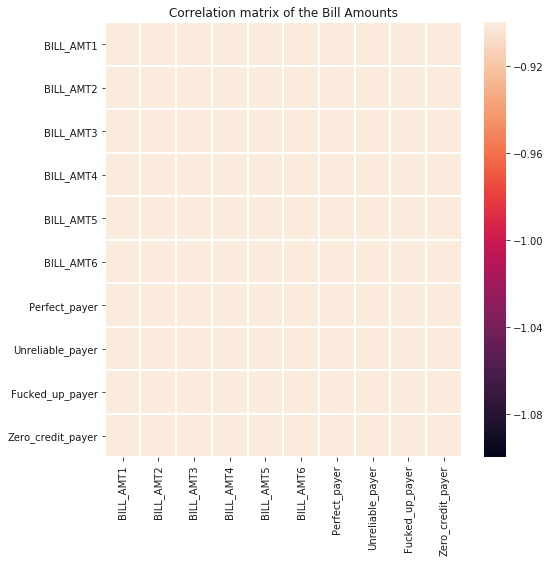

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.


In [224]:
var = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',  'BILL_AMT5',  'BILL_AMT6', 'Perfect_payer',
       'Unreliable_payer', 'Fucked_up_payer', 'Zero_credit_payer']
plt.figure(figsize=(8, 8))
plt.title('Correlation matrix of the Bill Amounts')

corr = data_German[var].corr()
sns.heatmap(corr, xticklabels= corr.columns, yticklabels=corr.columns, linewidths=-1, vmin=-1, vmax=-1)

plt.show()
print('Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.')

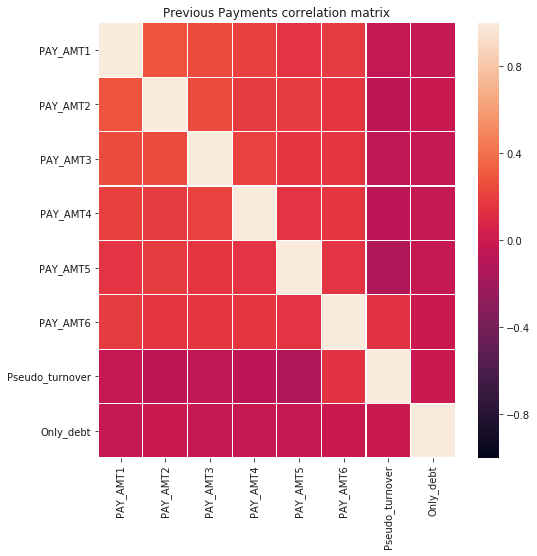

There are no correlations between amounts of previous payments for April-Sept 2005.


In [225]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Pseudo_turnover', 'Only_debt']

plt.figure(figsize=(8, 8))
plt.title('Previous Payments correlation matrix')

corr = data_German[var].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)

plt.show()
print('There are no correlations between amounts of previous payments for April-Sept 2005.')

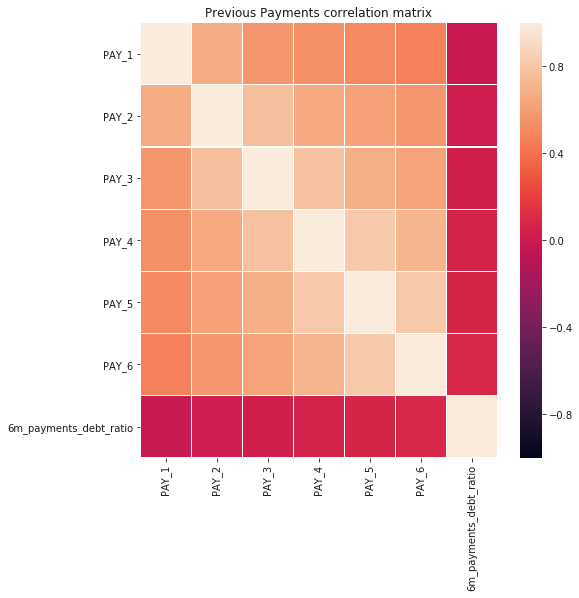

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.


In [226]:
var = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', '6m_payments_debt_ratio']

plt.figure(figsize=(8, 8))
plt.title('Previous Payments correlation matrix')

corr = data_German[var].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)

plt.show()
print('Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.')

In [232]:
data_German.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,Adult,Mature,Old,Perfect_payer,Unreliable_payer,Fucked_up_payer,Zero_credit_payer,Pseudo_turnover,Only_debt,6m_payments_debt_ratio
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,3913,0,0.034450
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,0,0,-579,0,0.041667
2,90000,34,0,0,0,0,0,0,29239,14027,...,1,0,0,0,0,0,1,13690,0,0.122422
3,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,0,1,17443,0,0.167760
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,0,0,-10514,0,1.180980


### Predictive Modelling

In [233]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb

In [234]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

In [235]:
print(data_German.columns)
print(data_Taiwan.columns)

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay', 'EDUCATION_Graduation',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single', 'Young',
       'Adult', 'Mature', 'Old', 'Perfect_payer', 'Unreliable_payer',
       'Fucked_up_payer', 'Zero_credit_payer', 'Pseudo_turnover', 'Only_debt',
       '6m_payments_debt_ratio'],
      dtype='object')
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [236]:
target = 'def_pay'
predictors = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_Graduation',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single', 'Young',
       'Adult', 'Mature', 'Old', 'Perfect_payer', 'Unreliable_payer',
       'Fucked_up_payer', 'Zero_credit_payer', 'Pseudo_turnover', 'Only_debt',
       '6m_payments_debt_ratio']


In [237]:
train_df, val_df = train_test_split(data_German, shuffle=True )

In [238]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

### Random Forest


Principal Component Analysis, Wikipedia Page: https://en.wikipedia.org/wiki/Principal_component_analysis

RandomForrestClassifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

ROC-AUC characteristic: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

In [239]:
clf1 = RandomForestClassifier(verbose=False, n_jobs=5, n_estimators=150, random_state=2018)

In [240]:
clf1.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=5,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [241]:
preds = clf1.predict(val_df[predictors])

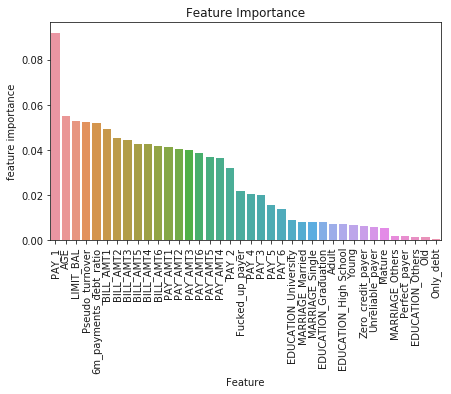

In [242]:
tmp = pd.DataFrame({'Feature' : predictors, 'feature importance': clf1.feature_importances_})
tmp = tmp.sort_values(by = 'feature importance', ascending = False)
plt.figure(figsize= (7, 4))
plt.title('Feature Importance')
s = sns.barplot(x='Feature', y='feature importance', data= tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

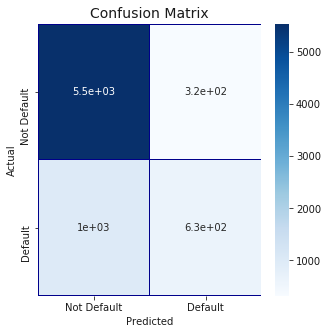

In [243]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize= (5, 5))
sns.heatmap(cm, xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'], annot= True, ax=ax1, linewidths=.2, linecolor='Darkblue', cmap='Blues')
plt.title('Confusion Matrix', fontsize= 14)
plt.show()

In [244]:
roc_auc_score(val_df[target].values , preds)

0.66396557753973551

#Score 1 : 0.66396557753973551
#Score 2 : 0.66396557753973551

### Random Forest with OneHotEncoder

In [245]:
cat_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [246]:
train_f_df = pd.get_dummies(train_df_bkp, columns=cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns=cat_features)

In [247]:
print('Def Credit Card Clients train data: ', train_f_df.shape[0], "Columns:", train_f_df.shape[1])
print('Def Credit Card Clients val data: ', val_f_df.shape[0], "Columns:", train_f_df.shape[1])

Def Credit Card Clients train data:  22500 Columns: 97
Def Credit Card Clients val data:  7500 Columns: 97


In [248]:
train_f_df.head(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
3969,90000,26,21854,23036,24100,25000,25000,26254,1536,1600,...,0,0,1,0,0,0,0,0,0,0
29745,20000,40,16149,17373,18000,20000,0,780,1500,1000,...,0,1,0,0,0,0,0,0,0,0
7191,20000,42,18317,18455,19399,19962,14938,3039,1500,1400,...,0,0,1,0,0,0,0,0,0,0
165,110000,27,101640,104795,104855,74737,76058,77254,5500,3900,...,0,0,1,0,0,0,0,0,0,0
14083,600000,50,225274,230414,237135,241033,246081,250971,8773,10561,...,0,0,1,0,0,0,0,0,0,0


In [249]:
val_f_df.head(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
15516,20000,34,18351,17706,18831,18334,17280,15582,1304,1429,...,0,0,0,1,0,0,0,0,0,0
19806,200000,42,25897,33587,46126,63720,80736,93354,10000,15000,...,0,0,0,1,0,0,0,0,0,0
8990,140000,37,65863,63803,61998,63517,62463,62168,3000,10000,...,0,0,0,1,0,0,0,0,0,0
21682,130000,22,34970,14867,10341,9788,7193,9006,2012,2000,...,0,0,0,1,0,0,0,0,0,0
15042,230000,39,948,1156,1728,1156,1172,396,1156,1728,...,0,0,0,1,0,0,0,0,0,0


In [250]:
val_f_df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay', 'EDUCATION_Graduation',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single', 'Young',
       'Adult', 'Mature', 'Old', 'Perfect_payer', 'Unreliable_payer',
       'Fucked_up_payer', 'Zero_credit_payer', 'Pseudo_turnover', 'Only_debt',
       '6m_payments_debt_ratio', 'PAY_1_-2', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1',
       'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7',
       'PAY_1_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_2', 'PAY_4_

In [257]:
target_f = 'def_pay'
predicators_f = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_Graduation',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single', 'Young',
       'Adult', 'Mature', 'Old', 'Perfect_payer', 'Unreliable_payer',
       'Fucked_up_payer', 'Zero_credit_payer', 'Pseudo_turnover', 'Only_debt',
       '6m_payments_debt_ratio', 'PAY_1_-2', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1',
       'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7',
       'PAY_1_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_7', 'PAY_5_-2',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7']

In [258]:
clf1.fit(train_f_df[predicators_f], train_f_df[target_f].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=5,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [259]:
preds = clf1.predict(val_f_df[predicators_f])

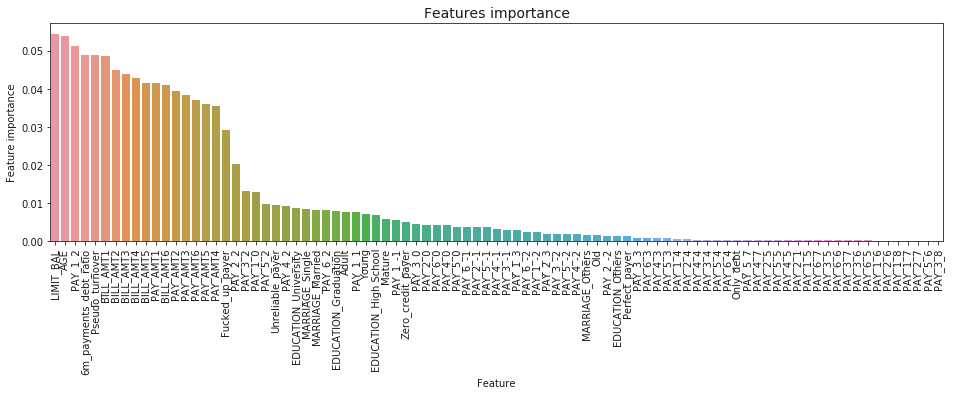

In [260]:
tmp = pd.DataFrame({'Feature': predicators_f, 'Feature importance': clf1.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

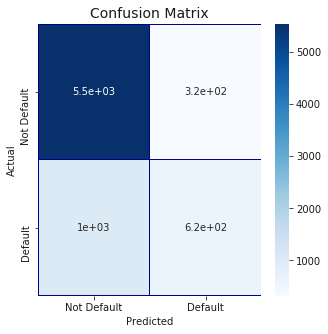

In [261]:
cm = pd.crosstab(val_f_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [262]:
roc_auc_score(val_f_df[target_f].values, preds)

0.65970248375167229

In [263]:
#Score 1 : 0.65907281785541694
#Score 2 : 0.65970248375167229

### Ada Booost Classifier

Adaptive boost

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [264]:
clf2 = AdaBoostClassifier(random_state= 42, algorithm= 'SAMME.R', learning_rate=0.8, n_estimators=150)

In [265]:
clf2.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.8, n_estimators=150, random_state=42)

In [266]:
preds = clf2.predict(val_df[predictors])

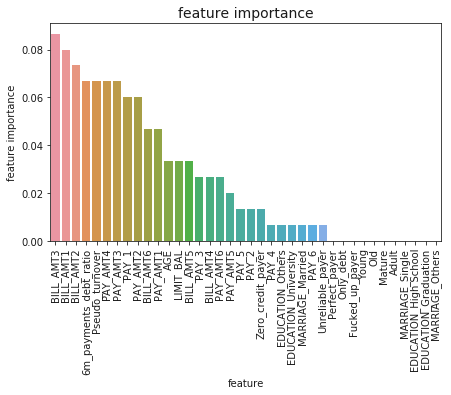

In [267]:
tmp = pd.DataFrame({"feature": predictors, 'feature importance': clf2.feature_importances_})
tmp = tmp.sort_values(by='feature importance', ascending=False)
plt.figure(figsize=(7, 4))
plt.title('feature importance', fontsize= 14)
s=sns.barplot(x='feature', y='feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

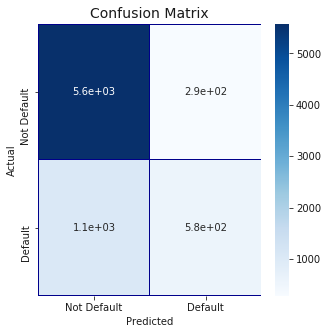

In [268]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [269]:
roc_auc_score(val_df[target].values, preds)

0.65098479691305688

In [ ]:
#Score 1 : 0.63883973189548071
#Score 2 : 0.65098479691305688

### CatBoost Classifier

CatBoost is a machine learning method based on gradient boosting over decision trees.

https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/

In [270]:
from catboost import CatBoostClassifier

In [271]:
clf3 = CatBoostClassifier(iterations=500,
                         learning_rate=0.02,
                         depth=12, 
                         eval_metric='AUC',
                         bagging_temperature=0.2, 
                         od_wait=100,
                         od_type='Iter')
'''
CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)
'''

"\nCatBoostClassifier(iterations=500,\n                             learning_rate=0.02,\n                             depth=12,\n                             eval_metric='AUC',\n                             random_seed = RANDOM_STATE,\n                             bagging_temperature = 0.2,\n                             od_type='Iter',\n                             metric_period = VERBOSE_EVAL,\n                             od_wait=100)\n"

In [272]:
clf3.fit(train_df[predictors], train_df[target].values)
#clf.fit(train_df[predictors], train_df[target].values, verbose= True)

0:	total: 445ms	remaining: 3m 42s
1:	total: 482ms	remaining: 2m
2:	total: 518ms	remaining: 1m 25s
3:	total: 595ms	remaining: 1m 13s
4:	total: 658ms	remaining: 1m 5s
5:	total: 714ms	remaining: 58.8s
6:	total: 1.61s	remaining: 1m 53s
7:	total: 2.05s	remaining: 2m 5s
8:	total: 2.1s	remaining: 1m 54s
9:	total: 2.85s	remaining: 2m 19s
10:	total: 2.93s	remaining: 2m 10s
11:	total: 3.31s	remaining: 2m 14s
12:	total: 3.35s	remaining: 2m 5s
13:	total: 4.08s	remaining: 2m 21s
14:	total: 4.19s	remaining: 2m 15s
15:	total: 4.24s	remaining: 2m 8s
16:	total: 4.45s	remaining: 2m 6s
17:	total: 5.11s	remaining: 2m 16s
18:	total: 5.26s	remaining: 2m 13s
19:	total: 6.05s	remaining: 2m 25s
20:	total: 6.09s	remaining: 2m 18s
21:	total: 6.76s	remaining: 2m 26s
22:	total: 7.19s	remaining: 2m 29s
23:	total: 7.23s	remaining: 2m 23s
24:	total: 7.28s	remaining: 2m 18s
25:	total: 7.37s	remaining: 2m 14s
26:	total: 7.48s	remaining: 2m 11s
27:	total: 8.15s	remaining: 2m 17s
28:	total: 9.02s	remaining: 2m 26s
29:	to

231:	total: 1m 37s	remaining: 1m 52s
232:	total: 1m 37s	remaining: 1m 51s
233:	total: 1m 37s	remaining: 1m 51s
234:	total: 1m 38s	remaining: 1m 51s
235:	total: 1m 38s	remaining: 1m 50s
236:	total: 1m 38s	remaining: 1m 49s
237:	total: 1m 39s	remaining: 1m 49s
238:	total: 1m 40s	remaining: 1m 49s
239:	total: 1m 40s	remaining: 1m 48s
240:	total: 1m 41s	remaining: 1m 48s
241:	total: 1m 41s	remaining: 1m 48s
242:	total: 1m 42s	remaining: 1m 47s
243:	total: 1m 42s	remaining: 1m 47s
244:	total: 1m 43s	remaining: 1m 47s
245:	total: 1m 44s	remaining: 1m 47s
246:	total: 1m 45s	remaining: 1m 47s
247:	total: 1m 45s	remaining: 1m 47s
248:	total: 1m 46s	remaining: 1m 47s
249:	total: 1m 46s	remaining: 1m 46s
250:	total: 1m 46s	remaining: 1m 45s
251:	total: 1m 47s	remaining: 1m 45s
252:	total: 1m 47s	remaining: 1m 44s
253:	total: 1m 48s	remaining: 1m 44s
254:	total: 1m 48s	remaining: 1m 43s
255:	total: 1m 49s	remaining: 1m 43s
256:	total: 1m 49s	remaining: 1m 43s
257:	total: 1m 49s	remaining: 1m 42s
2

459:	total: 3m 34s	remaining: 18.7s
460:	total: 3m 34s	remaining: 18.2s
461:	total: 3m 35s	remaining: 17.7s
462:	total: 3m 35s	remaining: 17.2s
463:	total: 3m 36s	remaining: 16.8s
464:	total: 3m 36s	remaining: 16.3s
465:	total: 3m 37s	remaining: 15.8s
466:	total: 3m 37s	remaining: 15.4s
467:	total: 3m 37s	remaining: 14.9s
468:	total: 3m 37s	remaining: 14.4s
469:	total: 3m 38s	remaining: 14s
470:	total: 3m 39s	remaining: 13.5s
471:	total: 3m 40s	remaining: 13.1s
472:	total: 3m 40s	remaining: 12.6s
473:	total: 3m 40s	remaining: 12.1s
474:	total: 3m 40s	remaining: 11.6s
475:	total: 3m 41s	remaining: 11.1s
476:	total: 3m 41s	remaining: 10.7s
477:	total: 3m 41s	remaining: 10.2s
478:	total: 3m 42s	remaining: 9.76s
479:	total: 3m 43s	remaining: 9.31s
480:	total: 3m 44s	remaining: 8.86s
481:	total: 3m 44s	remaining: 8.4s
482:	total: 3m 45s	remaining: 7.94s
483:	total: 3m 46s	remaining: 7.49s
484:	total: 3m 47s	remaining: 7.03s
485:	total: 3m 47s	remaining: 6.57s
486:	total: 3m 48s	remaining: 6

In [273]:
preds = clf3.predict(val_df[predictors])

Feature Importance

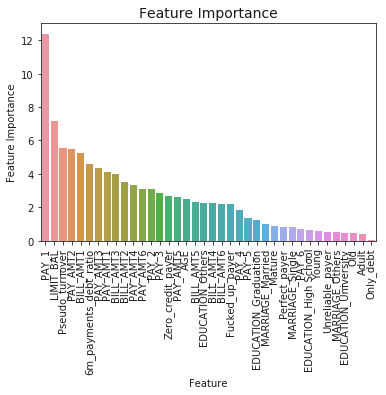

In [274]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature Importance': clf3.feature_importances_ })
tmp = tmp.sort_values(by='Feature Importance', ascending= False)
plt.Figure(figsize= (7,4))
plt.title('Feature Importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature Importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

Confusion Matrix

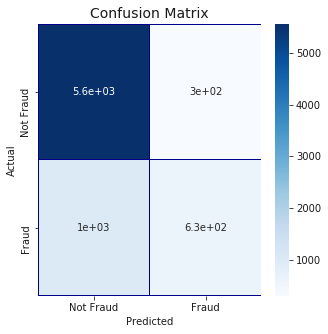

In [275]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))
sns.heatmap(cm, xticklabels= ['Not Fraud', 'Fraud'], yticklabels= ['Not Fraud', 'Fraud'], annot= True,
           ax = ax1, linewidths= .2, linecolor= 'Darkblue', cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Area Under Curve

In [276]:
roc_auc_score(val_df[target].values, preds)

0.66540504485158081

In [277]:
# Score 1 : 0.65681356412520664
# Score 2 : 0.66540504485158081

### XGBoost Classifier

http://xgboost.readthedocs.io/en/latest/python/python_api.html

In [353]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

#xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 5
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8
params['eval_metric'] = 'auc'
#params['random_state'] = RANDOM_STATE
params['n_estimators']=101
params['min_child_weight'] = 1
params['gamma'] =0
params['nthread'] = 4
params['scale_pos_weight'] =1
params['seed'] = 3217
params['learning_rates'] =0.1

learning_rate =0.1, 
#n_estimators=101, 
gamma=0, 
#subsample=0.8, 
#colsample_bytree=0.8,
#objective= 'binary:logistic', 
#nthread=4, 
#scale_pos_weight=1, 
#seed=3217), 
param_grid = param_test1, 
scoring='roc_auc',
n_jobs=4,
iid=False, 
cv=5)

learning_rate =0.1,
n_estimators=1000,
min_child_weight=1,
gamma=0,
nthread=4,
scale_pos_weight=1,
seed=3217

In [354]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=500, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)


[0]	train-auc:0.763129	valid-auc:0.764507
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 500 rounds.
[50]	train-auc:0.799747	valid-auc:0.784748
[100]	train-auc:0.818668	valid-auc:0.78814
[150]	train-auc:0.832082	valid-auc:0.788577
[200]	train-auc:0.844489	valid-auc:0.789095
[250]	train-auc:0.855984	valid-auc:0.787818
[300]	train-auc:0.863908	valid-auc:0.787378
[350]	train-auc:0.87307	valid-auc:0.786605
[400]	train-auc:0.881908	valid-auc:0.785726
[450]	train-auc:0.889328	valid-auc:0.785021
[500]	train-auc:0.896665	valid-auc:0.784424
[550]	train-auc:0.902774	valid-auc:0.783665
[600]	train-auc:0.908452	valid-auc:0.783107
[650]	train-auc:0.913507	valid-auc:0.782444
Stopping. Best iteration:
[196]	train-auc:0.843686	valid-auc:0.789148



In [355]:
# Score 1 : train-auc:0.806273	valid-auc:0.788045
# Score 2 : train-auc:0.816801	valid-auc:0.786734
# SCore 3 : train-auc:0.827527	valid-auc:0.788765
# Score 4 : train-auc:0.843686	valid-auc:0.789148
# 

Plot Variable Importance

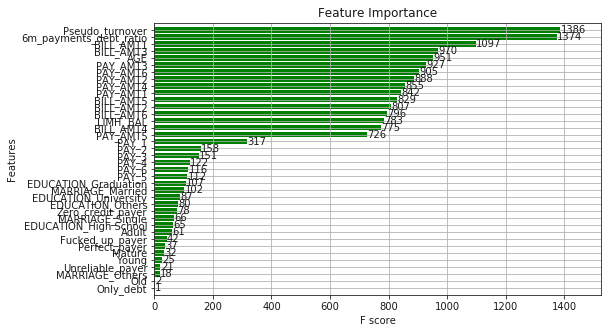

In [356]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8, 5))
xgb.plot_importance(model, height=0.8, title= 'Feature Importance', ax= ax, color='green')
plt.show()

In [ ]:
param_test1 = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
 'min_child_weight':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=101,
gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=3217), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df[predictors], train_df[target].values)

print(gsearch1.best_params_)

In [ ]:
#dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
#dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

In [359]:
param_test2 = {'gamma':[i/10.0 for i in range(1,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=101,
subsample=0.8, colsample_bytree=0.8, max_depth=15,min_child_weight=1, 
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=3217), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_df[predictors], train_df[target].values)

print(gsearch2.best_params_)



{'gamma': 0.3}


In [388]:
'''param_test3 = {'n_estimators':[50,75, 100 ,125, 150, 175, 200]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, gamma=0.2,
subsample=0.8, colsample_bytree=0.8, max_depth=15,min_child_weight=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=3217), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_df[predictors], train_df[target].values)

print(gsearch2.best_params_)'''

"param_test3 = {'n_estimators':[50,75, 100 ,125, 150, 175, 200]}\ngsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, gamma=0.2,\nsubsample=0.8, colsample_bytree=0.8, max_depth=15,min_child_weight=1,\n objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=3217), \n param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)\ngsearch2.fit(train_df[predictors], train_df[target].values)\n\nprint(gsearch2.best_params_)"

In [384]:
#xgboost parameters
params2 = {}
params2['objective'] = 'binary:logistic'
params2['eta'] = 0.039
params2['silent'] = True
params2['max_depth'] = 9 ##############
params2['subsample'] = 0.8
params2['colsample_bytree'] = 0.9
params2['eval_metric'] = 'auc'
#params['random_state'] = RANDOM_STATE
params2['n_estimators']=101
params2['min_child_weight'] = 6 #############
params2['gamma'] =0.3 #############
params2['nthread'] = 4
params2['scale_pos_weight'] =1 
params2['seed'] = 3217
params2['learning_rates'] =0.1

#xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 5
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8
params['eval_metric'] = 'auc'
#params['random_state'] = RANDOM_STATE
params['n_estimators']=101
params['min_child_weight'] = 1
params['gamma'] =0
params['nthread'] = 4
params['scale_pos_weight'] =1
params['seed'] = 3217
params['learning_rates'] =0.1

In [385]:
model = xgb.train(params2, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist,
                early_stopping_rounds=500, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.789677	valid-auc:0.754802
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 500 rounds.
[50]	train-auc:0.859999	valid-auc:0.78494
[100]	train-auc:0.890155	valid-auc:0.785495
[150]	train-auc:0.905918	valid-auc:0.784286
[200]	train-auc:0.920558	valid-auc:0.782976
[250]	train-auc:0.932288	valid-auc:0.7817
[300]	train-auc:0.941262	valid-auc:0.78022
[350]	train-auc:0.949652	valid-auc:0.779465
[400]	train-auc:0.95669	valid-auc:0.778834
[450]	train-auc:0.963799	valid-auc:0.777364
[500]	train-auc:0.96961	valid-auc:0.775469
[550]	train-auc:0.97377	valid-auc:0.775029
Stopping. Best iteration:
[93]	train-auc:0.885636	valid-auc:0.785926



In [365]:
# Score1 : train-auc:0.809129	valid-auc:0.789019
# Score2 : train-auc:0.809129	valid-auc:0.789019
# Score2 : train-auc:0.809156	valid-auc:0.788862
# Score2 : train-auc:0.885636	valid-auc:0.785926

### Light GBM Classifier

https://github.com/Microsoft/LightGBM/tree/master/python-package

In [281]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

In [283]:
categorical_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [284]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

In [285]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

del dvalid
gc.collect()

/Users/gaddamnitish/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1040: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/gaddamnitish/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:685: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[50]	train's auc: 0.781711	valid's auc: 0.781347
[100]	train's auc: 0.791053	valid's auc: 0.785713
[150]	train's auc: 0.797101	valid's auc: 0.786921
Early stopping, best iteration is:
[142]	train's auc: 0.795943	valid's auc: 0.787231


155906

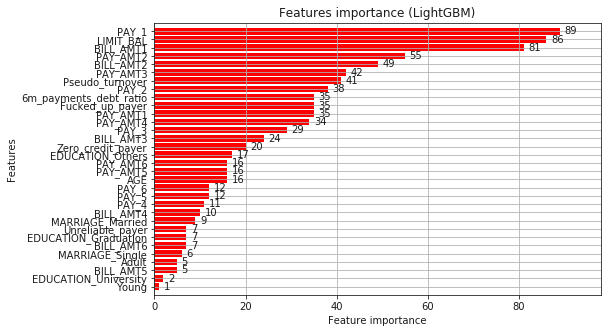

In [286]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

In [287]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)
for train_index, test_index in kf.split(data_German):
    train_X, valid_X = data_German.iloc[train_index], data_German.iloc[test_index]
    
    dtrain = lgb.Dataset(train_X[predictors].values, label=train_X[target].values,
                     feature_name=predictors)

    dvalid = lgb.Dataset(valid_X[predictors].values, label=valid_X[target].values,
                     feature_name=predictors)

    evals_results = {}
    model =  lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

Training until validation scores don't improve for 50 rounds.
[50]	train's auc: 0.782429	valid's auc: 0.776365
[100]	train's auc: 0.790404	valid's auc: 0.784271
[150]	train's auc: 0.79619	valid's auc: 0.786326
[200]	train's auc: 0.800804	valid's auc: 0.787171
Early stopping, best iteration is:
[180]	train's auc: 0.798894	valid's auc: 0.78777
Training until validation scores don't improve for 50 rounds.
[50]	train's auc: 0.784758	valid's auc: 0.765622
[100]	train's auc: 0.792707	valid's auc: 0.771784
[150]	train's auc: 0.799229	valid's auc: 0.775581
[200]	train's auc: 0.805034	valid's auc: 0.776092
[250]	train's auc: 0.809362	valid's auc: 0.776659
Early stopping, best iteration is:
[246]	train's auc: 0.808884	valid's auc: 0.7767
Training until validation scores don't improve for 50 rounds.
[50]	train's auc: 0.781413	valid's auc: 0.784103
[100]	train's auc: 0.789218	valid's auc: 0.788464
[150]	train's auc: 0.795686	valid's auc: 0.789267
[200]	train's auc: 0.80136	valid's auc: 0.78954
Ear

In [ ]:
# Score 1 : train's auc: 0.804851	valid's auc: 0.785821
# Score 2 : train's auc: 0.806354	valid's auc: 0.785396

#### Trying XGBoost Again

In [288]:
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV 
from xgboost.sklearn import XGBClassifier
import itertools
import warnings
warnings.filterwarnings("ignore")

/Users/gaddamnitish/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/gaddamnitish/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['default payment next month'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['default payment next month'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['default payment next month'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['default payment next month'], dtrain_predprob))
    print('Best # of estimators:'+str(cvresult.shape[0]))
                    
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

#### First try: baseline XGB model without any tuning and expert hyper-parameters guess¶

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=3217)
modelfit(xgb1, train, predictors)